# Exploratory Notebook

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('../Data/im.db')

In [3]:
pd.read_sql("""

SELECT *
FROM movie_basics







""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
pd.read_sql("""

SELECT *
FROM movie_ratings







""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
pd.read_sql("""

SELECT *
FROM movie_akas







""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [6]:
pd.read_sql("""

SELECT primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)
GROUP BY numvotes
ORDER BY averagerating DESC
LIMIT 25




""", conn)

,primary_title,averagerating,numvotes
0,Once Upon a Time ... in Hollywood,9.7,5600
1,Ekvtime: Man of God,9.6,2604
2,Aloko Udapadi,9.5,6509
3,Peranbu,9.4,9629
4,The Mountain II,9.3,100568
5,Aynabaji,9.3,18470
6,Wheels,9.3,17308
7,Adutha Chodyam,9.3,587
8,The Last Pogo Jumps Again,9.3,42
9,CM101MMXI Fundamentals,9.2,41560


In [7]:
pd.read_sql("""

SELECT genres, primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)
GROUP BY genres
ORDER BY numvotes DESC

""", conn)

,genres,primary_title,averagerating,numvotes
0,"Adventure,Drama,Sci-Fi",Interstellar,8.6,1299334
1,"Action,Adventure,Sci-Fi",Jurassic World,7.0,539338
2,"Adventure,Mystery,Sci-Fi",Prometheus,7.0,538720
3,"Adventure,Drama,Fantasy",Life of Pi,7.9,535836
4,"Mystery,Sci-Fi,Thriller",Limitless,7.4,492490
...,...,...,...,...
919,"Action,Romance,Sci-Fi",Archangel Alpha,6.8,5
920,"Action,Drama",To Chase a Million,7.4,5
921,"Action,Documentary,Horror",The Toxic Retards,6.4,5
922,"Action,Crime,Musical",1 911 Jak Boyz,4.4,5


In [8]:
df = pd.read_sql("""

SELECT DISTINCT genres, primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)


""", conn)

In [9]:
df

,genres,primary_title,averagerating,numvotes
0,"Action,Crime,Drama",Sunghursh,7.0,77
1,"Biography,Drama",One Day Before the Rainy Season,7.2,43
2,Drama,The Other Side of the Wind,6.9,4517
3,"Comedy,Drama",Sabse Bada Sukh,6.1,13
4,"Comedy,Drama,Fantasy",The Wandering Soap Opera,6.5,119
...,...,...,...,...
73851,Documentary,Diabolik sono io,6.2,6
73852,"Drama,Family",Sokagin Çocuklari,8.7,136
73853,Documentary,Albatross,8.5,8
73854,None,La vida sense la Sara Amat,6.6,5


In [52]:
df.isna().sum()

index            0
genres           0
primary_title    0
averagerating    0
numvotes         0
dtype: int64

In [10]:
df['genres'] = df['genres'].str.split(',') 

In [11]:
df

,genres,primary_title,averagerating,numvotes
0,"[Action, Crime, Drama]",Sunghursh,7.0,77
1,"[Biography, Drama]",One Day Before the Rainy Season,7.2,43
2,[Drama],The Other Side of the Wind,6.9,4517
3,"[Comedy, Drama]",Sabse Bada Sukh,6.1,13
4,"[Comedy, Drama, Fantasy]",The Wandering Soap Opera,6.5,119
...,...,...,...,...
73851,[Documentary],Diabolik sono io,6.2,6
73852,"[Drama, Family]",Sokagin Çocuklari,8.7,136
73853,[Documentary],Albatross,8.5,8
73854,None,La vida sense la Sara Amat,6.6,5


In [12]:
df = df[df['genres'].notnull()]

In [13]:
df = df.explode('genres')

In [14]:
df.head()

,genres,primary_title,averagerating,numvotes
0,Action,Sunghursh,7.0,77
0,Crime,Sunghursh,7.0,77
0,Drama,Sunghursh,7.0,77
1,Biography,One Day Before the Rainy Season,7.2,43
1,Drama,One Day Before the Rainy Season,7.2,43


In [15]:
df_genres = df.groupby('genres').agg({'averagerating': 'mean', 'numvotes': 'sum'})

In [16]:
df_genres

,averagerating,numvotes
genres,,
Action,5.810361,101161682
Adult,3.766667,164
Adventure,6.196201,84232589
Animation,6.248308,15353302
Biography,7.162274,21609446
Comedy,6.002689,74305805
Crime,6.115441,39631356
Documentary,7.332090,4739345
Drama,6.401559,119567500


array([[<AxesSubplot:title={'center':'averagerating'}>,
        <AxesSubplot:title={'center':'numvotes'}>]], dtype=object)

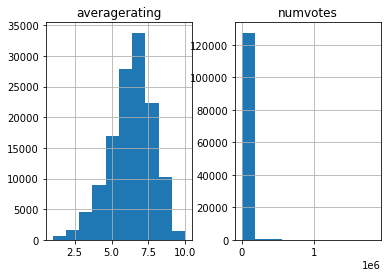

In [17]:
df.hist()

In [18]:
df.to_sql('cleaned_movies', conn, if_exists='replace')

In [19]:
df_genres.head(10)

,averagerating,numvotes
genres,,
Action,5.810361,101161682
Adult,3.766667,164
Adventure,6.196201,84232589
Animation,6.248308,15353302
Biography,7.162274,21609446
Comedy,6.002689,74305805
Crime,6.115441,39631356
Documentary,7.332090,4739345
Drama,6.401559,119567500


In [20]:
df_genres.tail(10)

,averagerating,numvotes
genres,,
Mystery,5.920401,24657286
News,7.271330,123319
Reality-TV,6.500000,459
Romance,6.146608,26913873
Sci-Fi,5.489755,42960289
Short,8.800000,8
Sport,6.961493,3755824
Thriller,5.639114,48155313
War,6.584291,2684725


<ipython-input-21-4891ac880ca6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_counts.index, rotation=45, ha='right')


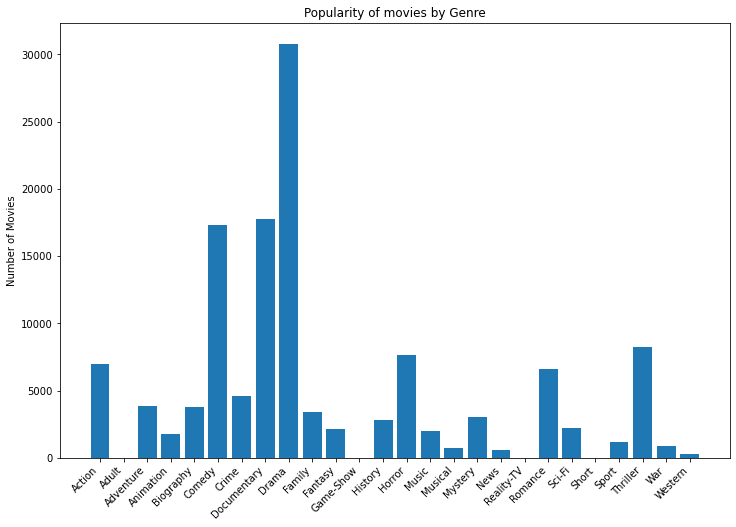

In [21]:
df = pd.read_sql("""SELECT * FROM cleaned_movies""", conn)

# Count genres
genre_counts = df.groupby('genres')['primary_title'].count()

# bar chart 
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(genre_counts.index, genre_counts.values)
ax.set_ylabel('Number of Movies')
ax.set_title('Popularity of movies by Genre')
ax.set_xticklabels(genre_counts.index, rotation=45, ha='right')

# show plot
plt.show();

In [22]:
dubbed_films_by_region = pd.read_sql("""

SELECT *
FROM movie_akas as akas
JOIN movie_ratings as mr
     ON mr.movie_id = akas.movie_id
WHERE attributes IS NOT NULL
AND language IS NOT NULL
AND averagerating IS NOT NULL
AND numvotes IS NOT NULL
GROUP BY language 
HAVING attributes = 'dubbed version'
ORDER BY numvotes DESC


""", conn)

In [23]:
dubbed_films_by_region

,movie_id,ordering,title,region,language,types,attributes,is_original_title,movie_id,averagerating,numvotes
0,tt0401729,24,John Carter Mahaveerudu,IN,te,None,dubbed version,0.0,tt0401729,6.6,241792
1,tt0401729,14,John Carter Maaveeran,IN,ta,None,dubbed version,0.0,tt0401729,6.6,241792
2,tt2279373,32,SpongeBob an Scannán: Spúinse as Uisce,IE,ga,None,dubbed version,0.0,tt2279373,6.0,43560
3,tt1305797,4,Robot,IN,hi,None,dubbed version,0.0,tt1305797,7.1,23102
4,tt4258292,3,Sathyadev I.P.S.,IN,kn,None,dubbed version,0.0,tt4258292,7.3,7243
5,tt2211173,4,Bhaiyya,IN,ml,None,dubbed version,0.0,tt2211173,5.5,5945
6,tt1223236,6,Félins d'Afrique,CA,fr,None,dubbed version,0.0,tt1223236,7.6,5784


In [24]:
pd.read_sql("""

SELECT DISTINCT language
FROM movie_akas as akas

""", conn)

,language
0,bg
1,None
2,he
3,fr
4,tr
...,...
72,zh
73,ja
74,gd
75,ku


In [25]:
df_genres.isna().sum()

averagerating    0
numvotes         0
dtype: int64

In [26]:
df.isna().sum()

index            0
genres           0
primary_title    0
averagerating    0
numvotes         0
dtype: int64

In [28]:
df.head()

,index,genres,primary_title,averagerating,numvotes
0,0,Action,Sunghursh,7.0,77
1,0,Crime,Sunghursh,7.0,77
2,0,Drama,Sunghursh,7.0,77
3,1,Biography,One Day Before the Rainy Season,7.2,43
4,1,Drama,One Day Before the Rainy Season,7.2,43


In [35]:
df_movies = pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes is NOT NULL
AND genres is NOT NULL
ORDER BY numvotes DESC



""", conn)

In [36]:
df_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
65715,tt9879060,The Winter Garden's Tale,The Winter Garden's Tale,2018,75.0,"Documentary,Drama",7.6,5
65716,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary,7.0,5
65717,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5
65718,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",9.2,5


In [34]:
df_movies.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [37]:
df_movies_runtime = df_movies = pd.read_sql("""

SELECT movie_id, primary_title, runtime_minutes 
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes is NOT NULL
AND genres is NOT NULL


""", conn)

In [51]:
df_movies_runtime.value_counts()

movie_id   primary_title                                                      runtime_minutes
tt9916160  Drømmeland                                                         72.0               1
tt2393965  Slaughter Tales                                                    91.0               1
tt2398136  I Miss U                                                           118.0              1
tt2398123  Ancient Alien Question: From UFOs to Extraterrestrial Visitations  70.0               1
tt2397982  G.A.I.N.                                                           64.0               1
                                                                                                ..
tt4768926  Vir Altyd                                                          100.0              1
tt4768902  Hallo Bungalow                                                     91.0               1
tt4768812  Vajrakaya                                                          145.0              1
tt4768794  I De

In [50]:
df_movies_runtime.describe()

,runtime_minutes
count,65720.000000
mean,94.732273
std,209.377017
min,3.000000
25%,81.000000
50%,91.000000
75%,104.000000
max,51420.000000


In [39]:
df_movies_runtime.mean()

runtime_minutes    94.732273
dtype: float64

In [40]:
df_movies_runtime.median()

runtime_minutes    91.0
dtype: float64

<AxesSubplot:>

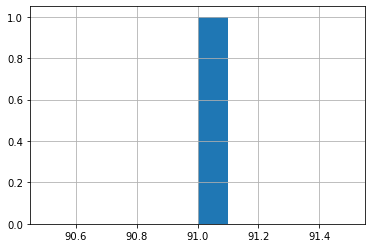

In [42]:
df_movies_runtime.median().hist()

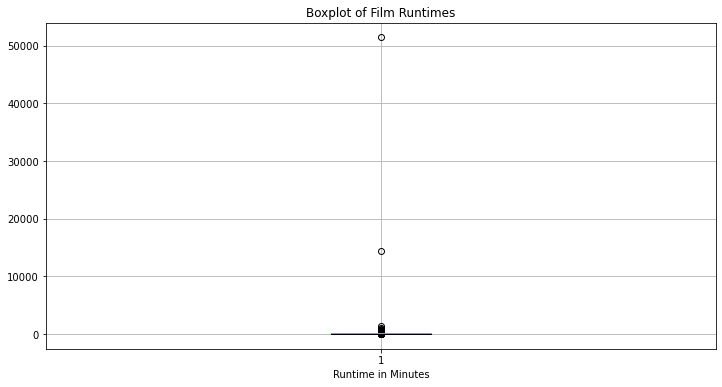

In [49]:
plt.figure(figsize=(12, 6))
plt.boxplot(df_movies['runtime_minutes'], vert=True)
plt.title('Boxplot of Film Runtimes')
plt.xlabel('Runtime in Minutes')
plt.grid(True)
plt.show()